Import Packages

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from utils import score, visualize_result, storeData, readData, create_sequences, setSeed
from pandas.plotting import register_matplotlib_converters
from scipy.stats import linregress
from utils import *
register_matplotlib_converters()


pollutant = ['O3', 'CO', 'NO2', 'SO2', 'PM2.5', 'PM10']
environment = ['RH', 'AMB_TEMP']


sgx_sensor_dict = {'c1_4#ec_na#0': 'O3',
                   'c1_0#ec_na#0': 'CO',
                   'c1_3#ec_na#0': 'NO2',
                   'c1_5#ec_na#0': 'SO2'}

unit_table = {'O3': 'ppb', 
              'CO': 'ppm',
              'NO2': 'ppb',
              'SO2': 'ppb'}


2023

In [7]:
ref_data = pd.read_csv('data/reference.csv', index_col = [0])
ref_data.index = pd.to_datetime(ref_data.index)
ref_data

,REF-O3,REF-CO,REF-NO2,REF-SO2,REF-PM2.5,REF-PM10,REF-RH,REF-AMB_TEMP
2023-01-01 00:00:00,38.7,0.23,4.8,1.0,14.0,14.0,86.0,18.4
2023-01-01 01:00:00,38.3,0.22,5.3,0.4,9.0,13.0,87.0,18.6
2023-01-01 02:00:00,38.3,0.22,4.4,0.2,6.0,8.0,89.0,18.5
2023-01-01 03:00:00,38.3,0.21,4.1,0.1,8.0,3.0,88.0,18.6
2023-01-01 04:00:00,38.2,0.20,3.9,0.5,5.0,4.0,88.0,18.9
...,...,...,...,...,...,...,...,...
2023-09-13 13:00:00,54.2,0.18,4.0,NaN,10.0,20.0,63.0,31.4
2023-09-13 14:00:00,47.7,0.16,4.2,1.3,8.0,13.0,61.0,31.3
2023-09-13 15:00:00,48.5,0.18,4.6,1.3,4.0,13.0,61.0,30.0
2023-09-13 16:00:00,47.6,0.20,5.6,1.4,5.0,15.0,64.0,29.6


SGX

In [8]:
sgx_data = pd.read_csv('data/sgx.csv', index_col = [0])
sgx_data.index = pd.to_datetime(sgx_data.index)
sgx_data

,SGX-O3,SGX-CO,SGX-NO2,SGX-SO2
measure_time,,,,
2023-01-01 08:00:00,-1.539167,6.763333,28.492500,115.645333
2023-01-01 09:00:00,-0.052000,5.354000,35.532833,143.715667
2023-01-01 10:00:00,-0.260333,5.516667,41.556333,168.006500
2023-01-01 11:00:00,-0.130000,5.578000,44.988500,184.928333
2023-01-01 12:00:00,-0.469000,6.089000,45.418000,196.317667
...,...,...,...,...
2023-09-13 03:00:00,-0.130167,5.707167,25.362000,-359.380000
2023-09-13 04:00:00,-0.156167,5.466667,21.631333,-344.722500
2023-09-13 05:00:00,-0.052167,5.807667,19.113500,-343.750000


SPEC

In [9]:
spec_data = pd.read_csv('data/spec.csv', index_col = [0])
spec_data.index = pd.to_datetime(spec_data.index)
spec_data

,SPEC-O3,SPEC-CO,SPEC-NO2,SPEC-SO2
measure_time,,,,
2023-01-07 11:00:00,-2.386834,5.747358,-14.257812,71.975528
2023-01-07 12:00:00,-2.239583,6.233724,-14.397786,80.398763
2023-01-07 13:00:00,-2.301432,6.930339,-15.050456,90.367839
2023-01-07 14:00:00,-2.664388,5.748698,-14.055990,75.003255
2023-01-07 15:00:00,-2.438151,5.312500,-12.535807,66.230469
...,...,...,...,...
2023-09-13 03:00:00,-1.985677,6.673177,-16.194661,37.565104
2023-09-13 04:00:00,-1.992188,6.445312,-16.269531,35.839844
2023-09-13 05:00:00,-1.920573,6.315104,-17.057292,37.434896


In [10]:
data = pd.concat([ref_data, sgx_data, spec_data], axis = 1)
data = data.reindex(data.index, fill_value=np.nan)
data = data.abs()
data = (data - data.min()) / (data.max() - data.min())

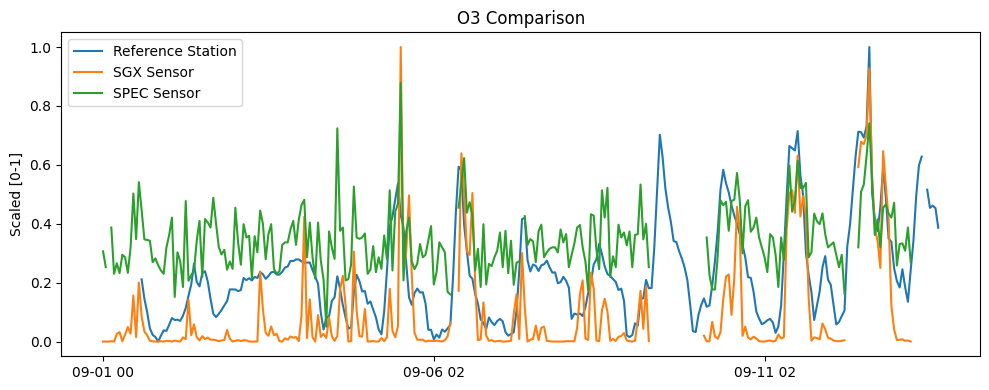

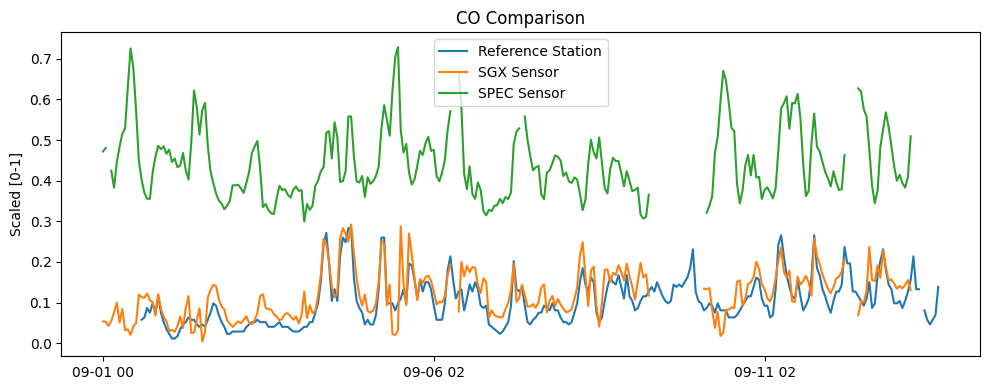

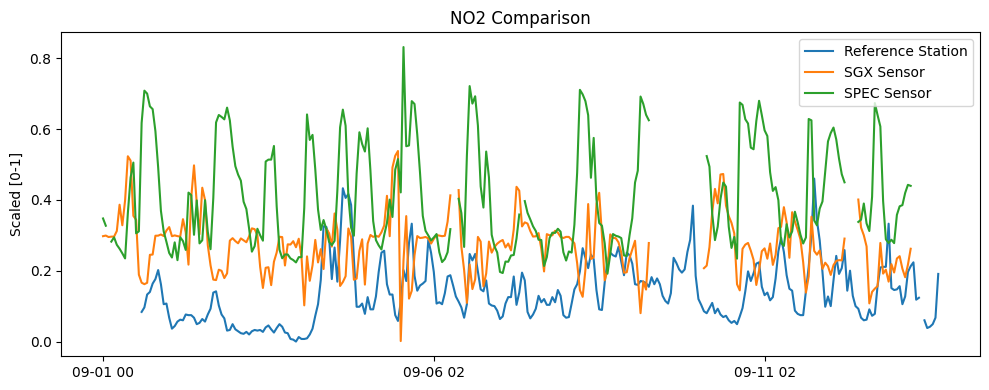

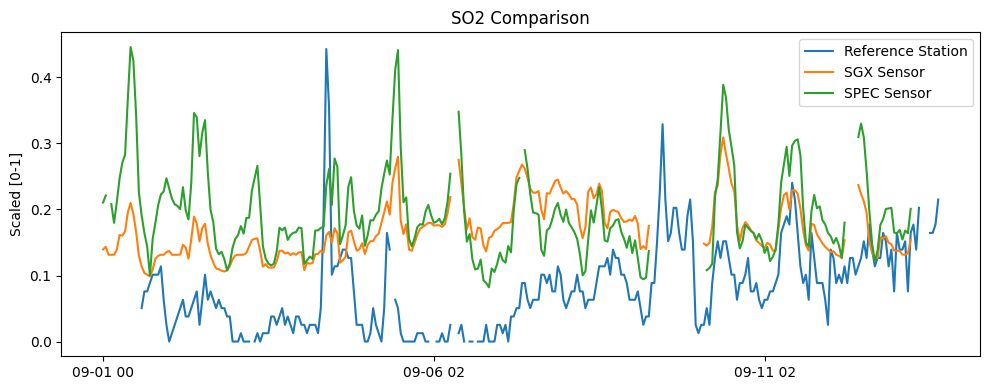

In [11]:
m_data = data[data.index.month == 9]

for gas in pollutant[:4]:
    # m_data = m_data.dropna(subset = [f'REF-{gas}', f'SGX-{gas}', f'SPEC-{gas}'])
    labels = list(map(lambda x: str(x)[5:13], m_data.index[::120]))
    plt.figure(figsize=(10, 4))
    plt.title(f'{gas} Comparison')
    plt.plot(m_data['REF-' + gas].values, label = 'Reference Station')
    plt.plot(m_data['SGX-' + gas].values, label = 'SGX Sensor')
    plt.plot(m_data['SPEC-' + gas].values, label = 'SPEC Sensor')
    plt.xticks(ticks = list(np.arange(0, len(m_data.index), 120)), labels=labels, rotation = 0)
    plt.ylabel(f'Scaled [0-1]')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'fig/{gas}_comparison.png', dpi=300, bbox_inches='tight')


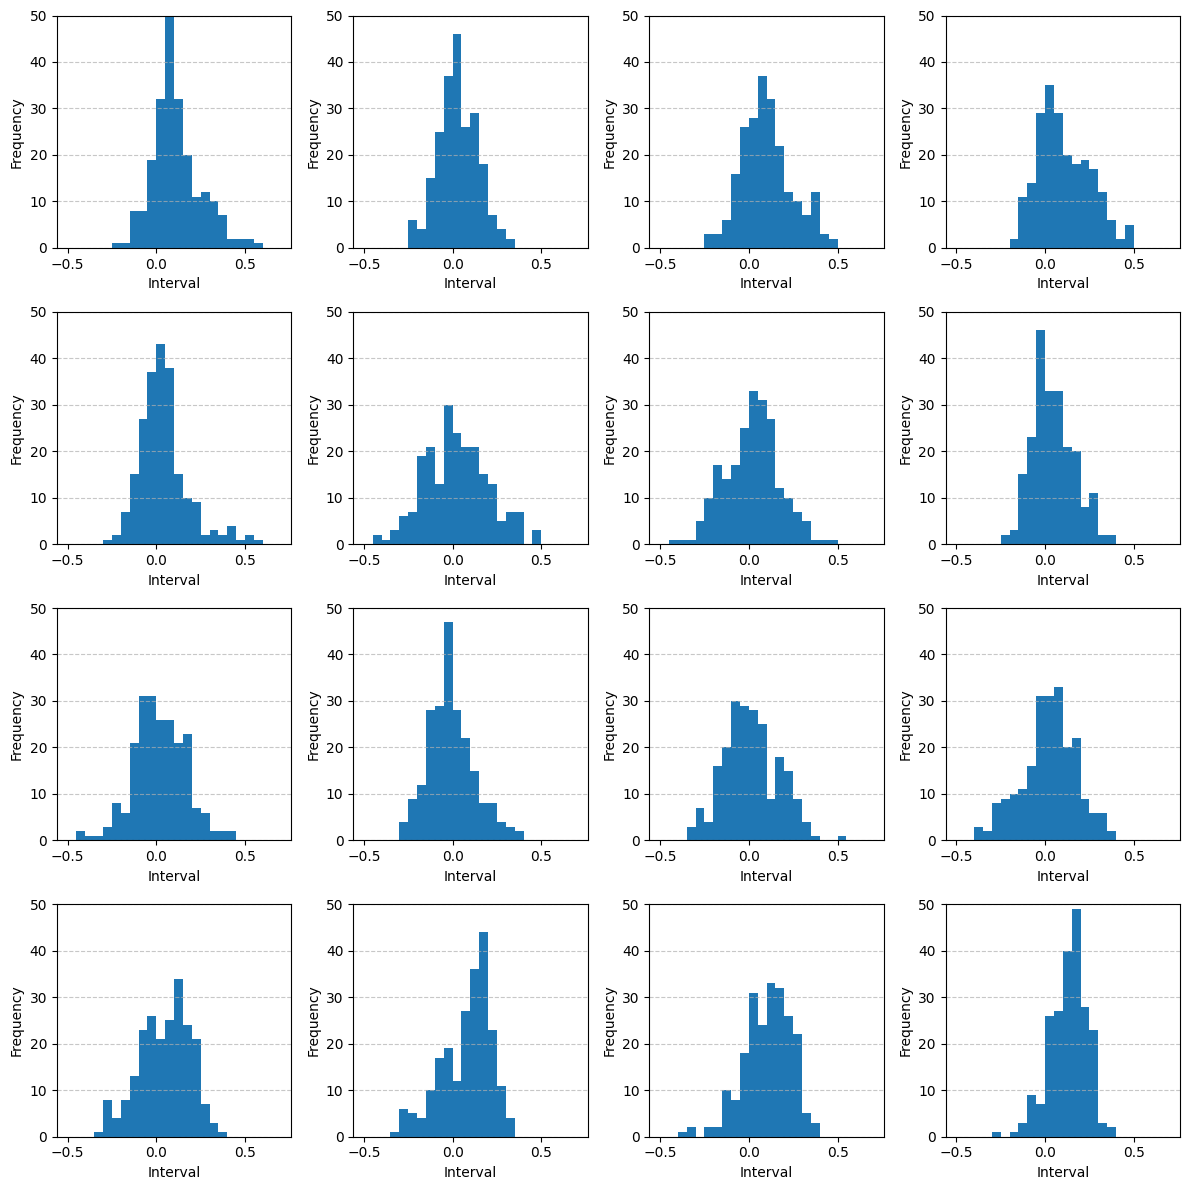

In [100]:
data.dropna(subset = ['SPEC-O3', 'REF-O3'], inplace=True)
dates = data.index
dates = dates[dates <= pd.to_datetime('2023-06-27 23:00:00')]
batches = np.array_split(dates, 16)
# Create a 4x4 subplot grid
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

# Iterate over i from 0 to 15 and create histograms
for i in range(16):
    row = i // 4
    col = i % 4
    ax = axes[row, col]

    # Define intervals and calculate histogram
    intervals = np.arange( -0.5, 0.75, 0.05)
    hist, _ = np.histogram(data.loc[batches[i], 'SPEC-O3'].values - data.loc[batches[i], 'REF-O3'].values, bins=intervals)

    # Create a bar plot on the current subplot
    ax.bar(intervals[:-1], hist, width=0.05, align='edge')
    ax.set_xlabel('Interval')
    ax.set_ylabel('Frequency')
    ax.set_ylim(0, 50)
    # ax.set_title(f'Interval {i+1}')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Correlation heatmap

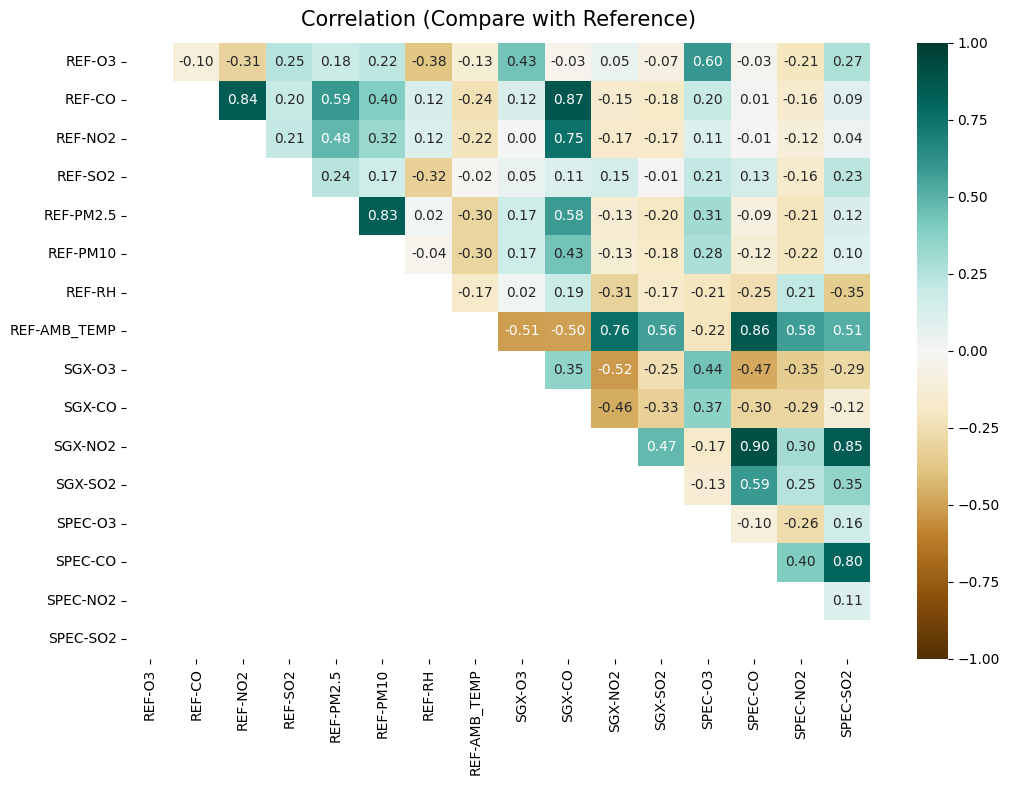

In [106]:
df = data.dropna().iloc[:, :]
plt.figure(figsize=(12, 8))
# define the mask to set the values in the upper triangle to True
mask = np.tril(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG', mask=mask, fmt=".2f")
heatmap.set_title('Correlation (Compare with Reference)', fontdict={'fontsize':15}, pad=12)
plt.savefig('./fig/correlation_heatmap_outer.png', dpi=300, bbox_inches='tight')

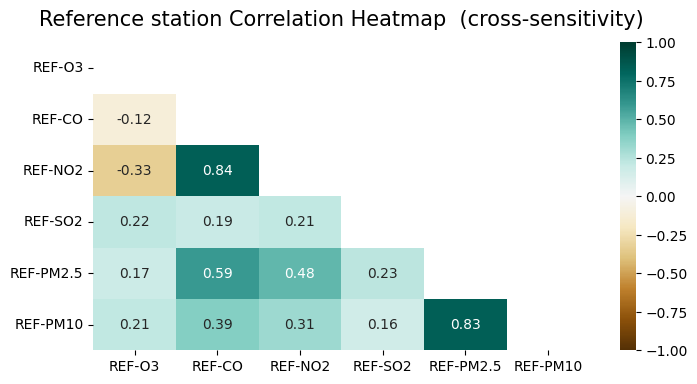

In [ ]:
df = data.dropna().iloc[:, 0:6]
plt.figure(figsize=(8, 4))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Reference station Correlation Heatmap  (cross-sensitivity)', fontdict={'fontsize':15}, pad=12)
plt.savefig('./fig/ref_correlation_heatmap.png', dpi=300, bbox_inches='tight')

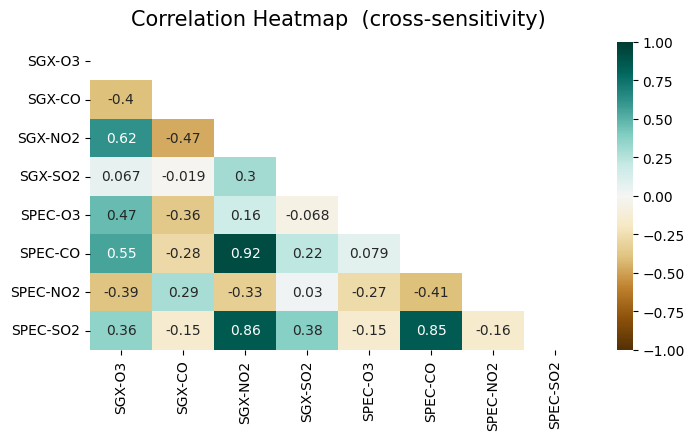

In [ ]:
df = data.dropna().iloc[:, 8:16]
plt.figure(figsize=(8, 4))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap  (cross-sensitivity)', fontdict={'fontsize':15}, pad=12)
plt.savefig('./fig/sgx_correlation_heatmap.png', dpi=300, bbox_inches='tight')

Target Gas & Settings

In [ ]:
gas = 'CO'

In [ ]:
df = data.dropna()
df['week'] = df.index.isocalendar().week

# Calculate the mean and standard deviation
mean_sgx, std_sgx = df[f'SGX-{gas}'].mean(), df[f'SGX-{gas}'].std()
mean_ref, std_ref = df[f'REF-{gas}'].mean(), df[f'REF-{gas}'].std()

# Define a condition for values within 2 standard deviations
condition_sgx = np.abs(df[f'SGX-{gas}'] - mean_sgx) <= 2*std_sgx
condition_ref = np.abs(df[f'REF-{gas}'] - mean_ref) <= 2*std_ref

# Apply the condition to the dataframe
df = df[condition_sgx & condition_ref]


C:\Users\user\AppData\Local\Temp\ipykernel_5608\1513354595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'] = df.index.isocalendar().week


Sensor Drift #1

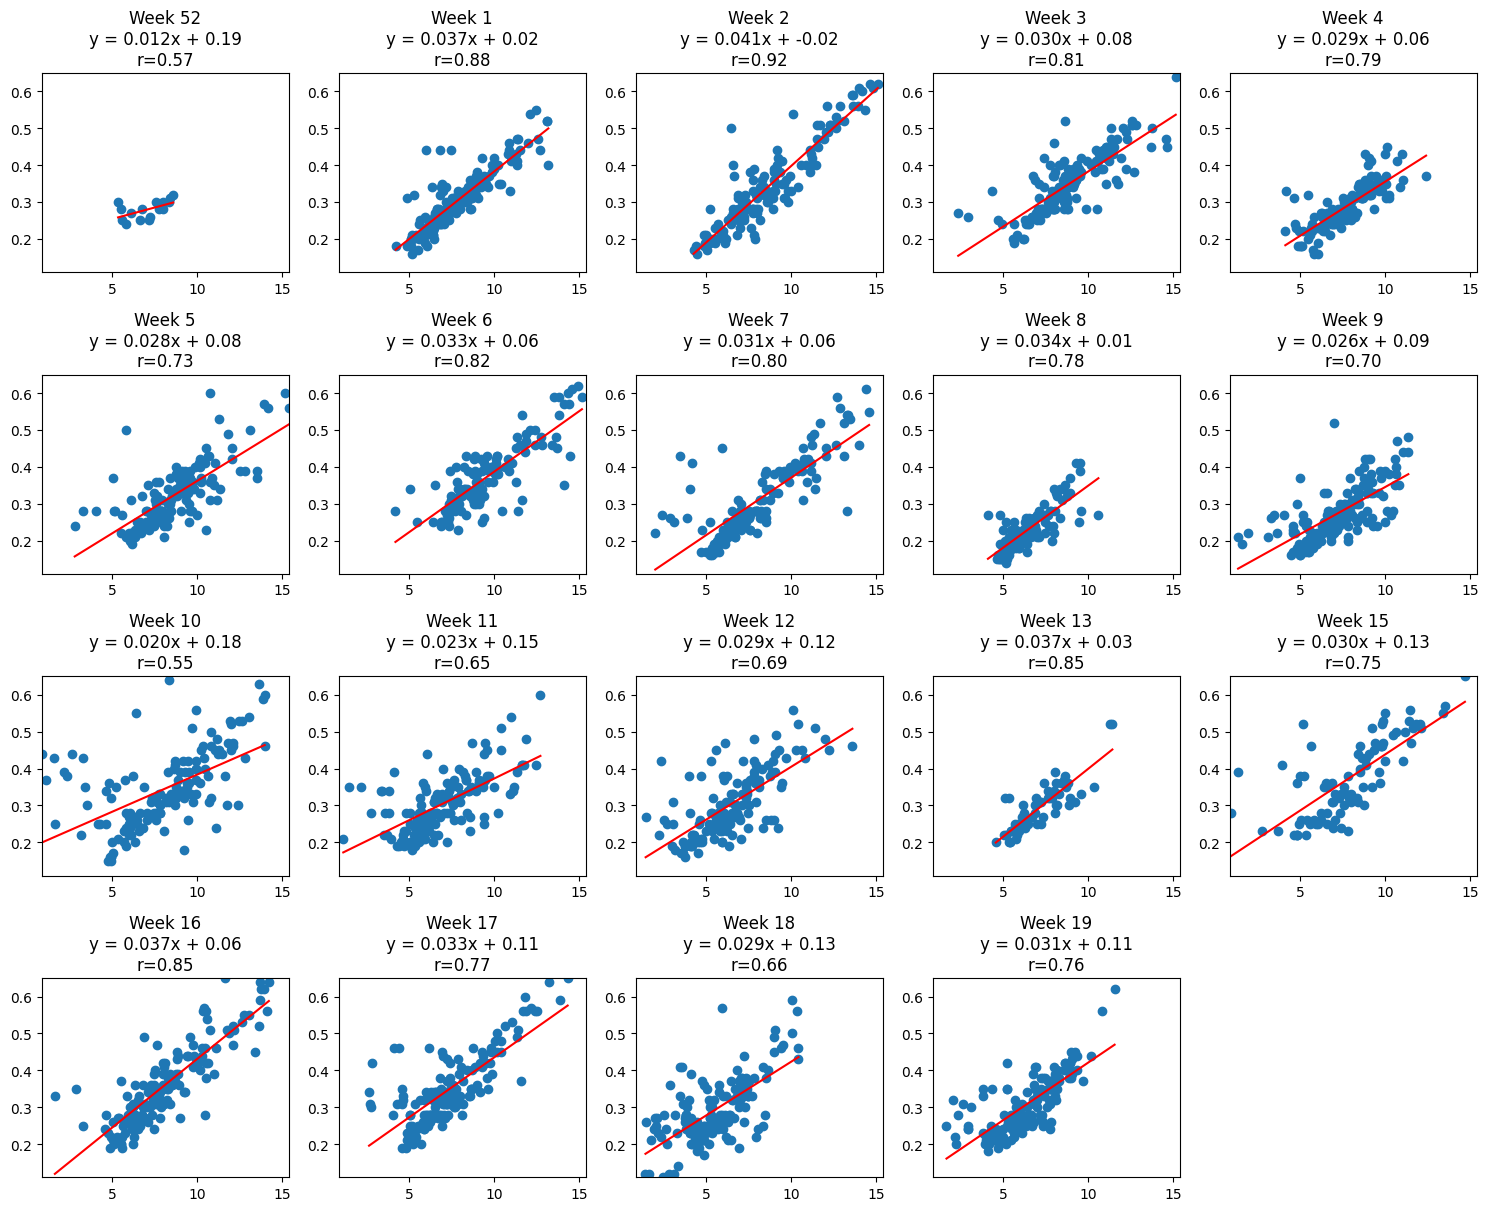

In [ ]:
# Determine the grid size for subplots
grid_size = int(np.ceil(np.sqrt(df['week'].nunique())))

# Calculate the global minimum and maximum for sensor data and station data
global_x_min, global_x_max = df[f'SGX-{gas}'].min(), df[f'SGX-{gas}'].max()
global_y_min, global_y_max = df[f'REF-{gas}'].min(), df[f'REF-{gas}'].max()

fig, axs = plt.subplots(grid_size, grid_size, figsize=(15, 15))

# Flatten the axis array to make indexing easier
axs = axs.flatten()

# Record the slope, r
slopes = []
rs = []

# For each week
for i, week in enumerate(df['week'].unique()):
    # Select the data for this week
    subset = df[df['week'] == week]
    
    # Create the scatter plot
    axs[i].scatter(subset[f'SGX-{gas}'], subset[f'REF-{gas}'])
    
    # Calculate the regression line parameters
    slope, intercept, r_value, p_value, std_err = linregress(subset[f'SGX-{gas}'], subset[f'REF-{gas}'])
    slopes.append(slope)
    rs.append(r_value)

    # Add the regression line
    x = np.linspace(subset[f'SGX-{gas}'].min(), subset[f'SGX-{gas}'].max())
    y = slope * x + intercept
    axs[i].plot(x, y, color='red')
    
    # Create the equation string
    equation = f'y = {slope:.3f}x + {intercept:.2f}'
    stats_text = f'r={r_value:.2f}'
    
    # Set the title to include the equation
    axs[i].set_title(f'Week {week}\n{equation}\n{stats_text}')

    # Set the x and y limits to the global minimum and maximum
    axs[i].set_xlim(global_x_min, global_x_max)
    axs[i].set_ylim(global_y_min, global_y_max)

# Remove extra subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


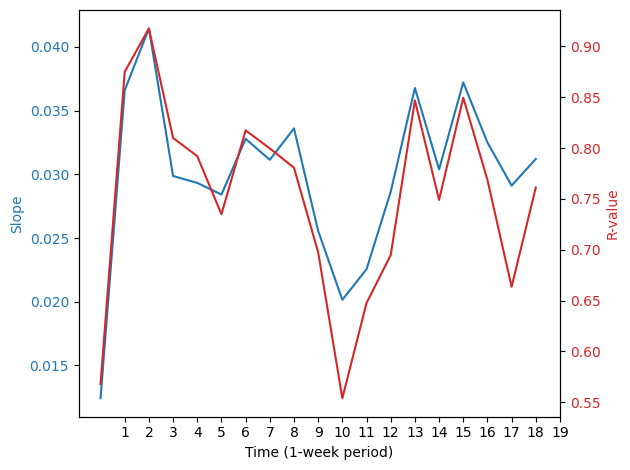

In [ ]:
fig, ax1 = plt.subplots()

# Plot the slopes on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Time (1-week period)')
ax1.set_ylabel('Slope', color=color)
ax1.plot(slopes, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Set x-ticks to be the weeks of the year
xticks = list(range(1, len(slopes) + 1))
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks)

# Create a second y-axis with the same x-axis
ax2 = ax1.twinx()

# Plot the r-values on the right y-axis
color = 'tab:red'
ax2.set_ylabel('R-value', color=color)
ax2.plot(rs, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set x-ticks to be the weeks of the year for the second y-axis
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks)

fig.tight_layout()
plt.show()


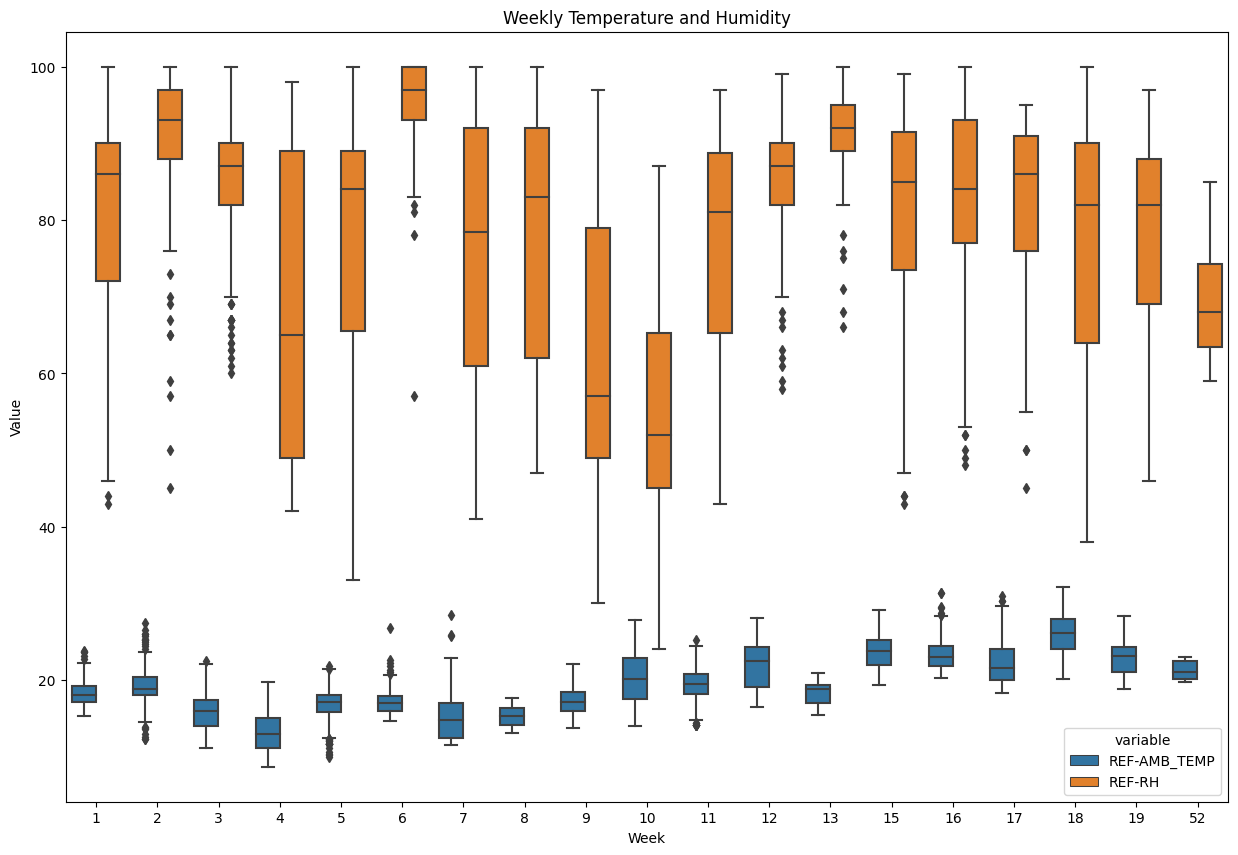

In [ ]:


# Prepare the data
df_melted = df.melt(id_vars='week', value_vars=['REF-AMB_TEMP', 'REF-RH'])

# Create the boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(x='week', y='value', hue='variable', data=df_melted)
plt.title('Weekly Temperature and Humidity')
plt.xlabel('Week')
plt.ylabel('Value')
plt.show()
